In [1]:
import pandas as pd
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

import numpy as np

# Classifiers tested
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

# Cross Validation
from sklearn.model_selection import cross_val_score
# Regression Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, auc, precision_recall_curve

# Visualizing the results
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt
from sklearn import tree
from matplotlib.colors import ListedColormap
from sklearn.inspection import DecisionBoundaryDisplay

# saving trained model with pickle
import pickle

# bespoke cleaning and data_split functions
from pre_processing import pre_processing, data_split

# Set seed for reproducibility
sd = 44

In [2]:
# Load individual classifiers
best_dtc = pickle.load(open('saved_models/classification/decision_tree_best_model.sav', 'rb'))
best_rfc = pickle.load(open('saved_models/classification/random_forest_best_classifier.sav', 'rb'))
best_xgb = pickle.load(open('saved_models/classification/gxboost_best.sav', 'rb'))
voting = pickle.load(open('saved_models/classification/voting_classfier.sav', 'rb'))

# Loading common test data for all classifiers
X_test = pd.read_csv('classification_test_data/X_test.csv', sep = '|').drop('Unnamed: 0', axis = 1)
y_test = np.ravel(pd.read_csv('classification_test_data/y_test.csv', sep = '|').drop('Unnamed: 0', axis = 1))

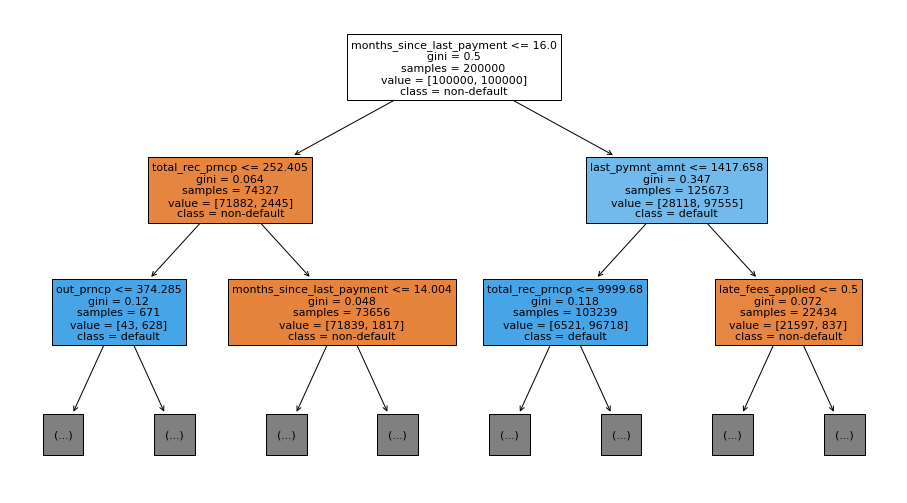

In [3]:
fig = plt.figure(figsize=(16,9))
_ = tree.plot_tree(best_dtc, 
                   feature_names=X_test.columns,  
                   max_depth=2,
                   fontsize= 11,
                   class_names=['non-default', 'default'],
                   filled=True)

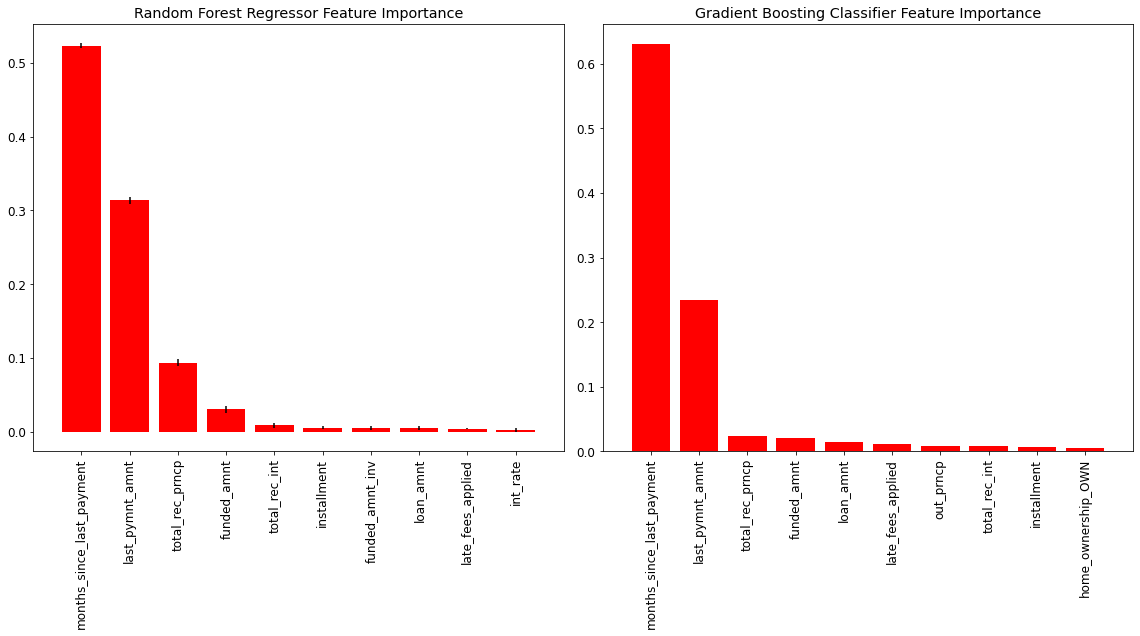

In [4]:
plt.rcParams['font.size'] = 12
fig = plt.figure(figsize=(16,9))

ax1 = fig.add_subplot(121)
skplt.estimators.plot_feature_importances(best_rfc, feature_names=X_test.columns,
                                         title="Random Forest Regressor Feature Importance",
                                         x_tick_rotation=90,
                                         max_num_features=10,
                                         ax=ax1);

ax2 = fig.add_subplot(122)
skplt.estimators.plot_feature_importances(best_xgb, feature_names=X_test.columns,
                                         title="Gradient Boosting Classifier Feature Importance",
                                         x_tick_rotation=90,
                                         max_num_features=10,
                                         ax=ax2);

plt.tight_layout()

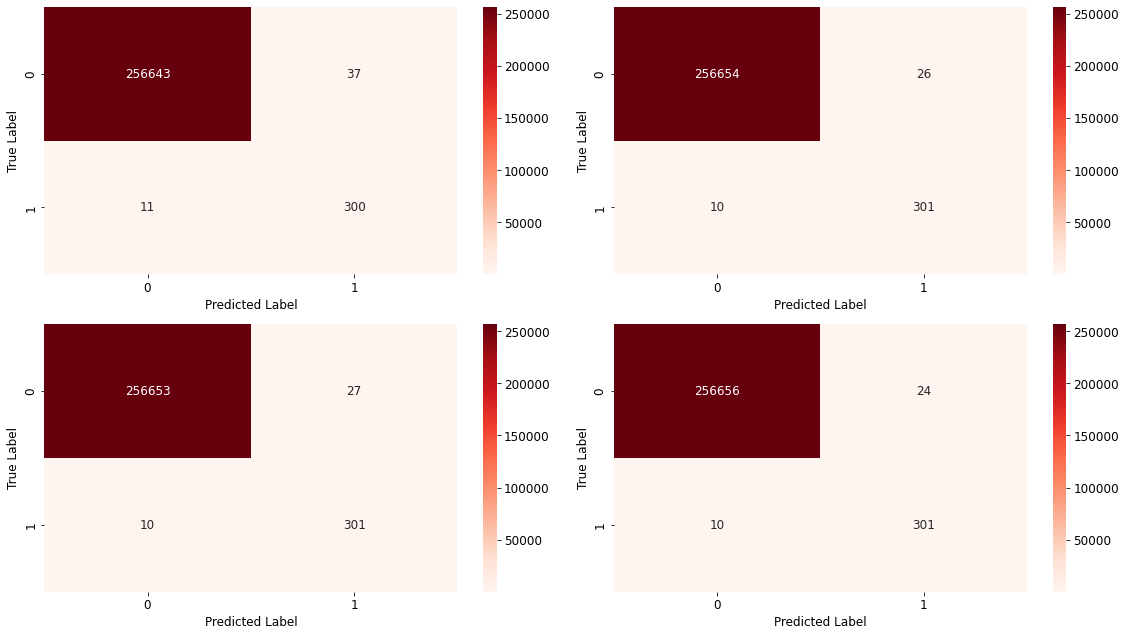

In [5]:
plt.rcParams['font.size'] = 12
fig = plt.figure(figsize=(16,9))

y_pred_dtc = best_dtc.predict(X_test)
y_pred_rfc = best_rfc.predict(X_test)
y_pred_xgb = best_xgb.predict(X_test)
y_pred_vot = voting.predict(X_test)


cf_matrix_dtc = confusion_matrix(y_test, y_pred_dtc)
cf_matrix_rfc = confusion_matrix(y_test, y_pred_rfc)
cf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
cf_matrix_vot = confusion_matrix(y_test, y_pred_vot)

ax1 = fig.add_subplot(221)
sns.heatmap(cf_matrix_dtc, annot=True, cmap='Reds',fmt='.10g')
ax1.set_xlabel(("Predicted Label"))
ax1.set_ylabel(("True Label"))

ax2 = fig.add_subplot(222)
sns.heatmap(cf_matrix_rfc, annot=True, cmap='Reds',fmt='.10g')
ax2.set_xlabel(("Predicted Label"))
ax2.set_ylabel(("True Label"))

ax3 = fig.add_subplot(223)
sns.heatmap(cf_matrix_xgb, annot=True, cmap='Reds',fmt='.10g')
ax3.set_xlabel(("Predicted Label"))
ax3.set_ylabel(("True Label"))

ax4 = fig.add_subplot(224)
sns.heatmap(cf_matrix_vot, annot=True, cmap='Reds',fmt='.10g')
ax4.set_xlabel(("Predicted Label"))
ax4.set_ylabel(("True Label"))


plt.tight_layout()



In [6]:
y_pred_dtc = best_dtc.predict(X_test)
y_pred_rfc = best_rfc.predict(X_test)
y_pred_xgb = best_xgb.predict(X_test)
y_pred_vot = voting.predict(X_test)

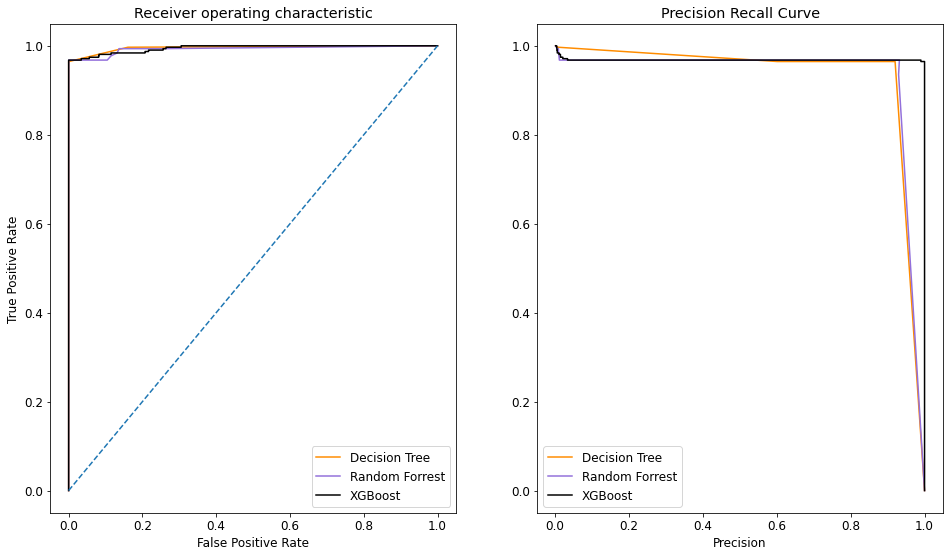

AUC Score model 1:  0.9954907758581379
AUC Score model 2:  0.9927926511021017
AUC Score model 3:  0.9948014330403515


In [7]:
Y_probs_dtc = best_dtc.predict_proba(X_test)
Y_probs_rfc = best_rfc.predict_proba(X_test)
Y_probs_xgb = best_xgb.predict_proba(X_test)

#Find the ROC & Precision-Recall of the probabilities of defualt
Y_probs_dtc = Y_probs_dtc[:, 1]
Y_probs_rfc = Y_probs_rfc[:, 1]
Y_probs_xgb = Y_probs_xgb[:, 1]
fallout1, sensitivity1, thresholds1 = roc_curve(y_test, Y_probs_dtc)
fallout2, sensitivity2, thresholds2 = roc_curve(y_test, Y_probs_rfc)
fallout3, sensitivity3, thresholds3 = roc_curve(y_test, Y_probs_xgb)

#Find the Precision-Recall characteristics
precision1, recall1, thresholds1 = precision_recall_curve(y_test, Y_probs_dtc)
precision2, recall2, thresholds2 = precision_recall_curve(y_test, Y_probs_rfc)
precision3, recall3, thresholds3 = precision_recall_curve(y_test, Y_probs_xgb)


fig = plt.figure(figsize=(16,9))

ax1 = fig.add_subplot(121)
ax1.plot(fallout1, sensitivity1, color = 'darkorange', label='Decision Tree')
ax1.plot(fallout2, sensitivity2, color = 'mediumpurple',label='Random Forrest')
ax1.plot(fallout3, sensitivity3, color = 'black',label='XGBoost')
ax1.plot([0,1], [0,1], linestyle = '--')
ax1.set_title("Receiver operating characteristic")
ax1.set_xlabel("False Positive Rate")
ax1.set_ylabel("True Positive Rate")
ax1.legend()

ax2 = fig.add_subplot(122)
ax2.plot(precision1, recall1, color = 'darkorange', label='Decision Tree')
ax2.plot(precision2, recall2, color = 'mediumpurple',label='Random Forrest')
ax2.plot(precision3, recall3, color = 'black',label='XGBoost')

ax2.set_title("Precision Recall Curve")
ax2.set_xlabel("Recall")
ax2.set_xlabel("Precision")
ax2.legend()


plt.show()
auc1 = roc_auc_score(y_test, Y_probs_dtc)
auc2 = roc_auc_score(y_test, Y_probs_rfc)
auc3 = roc_auc_score(y_test, Y_probs_xgb)
print("AUC Score model 1: ",auc1)
print("AUC Score model 2: ",auc2)
print("AUC Score model 3: ",auc3)

C:\Users\DE7\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(63.559999999999995, 18290.64)

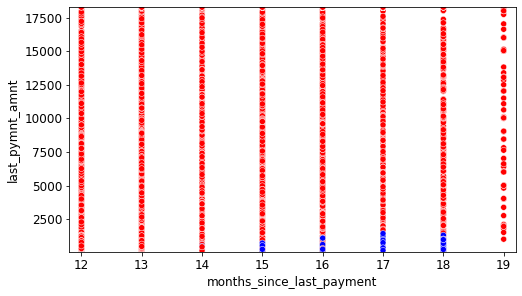

In [8]:

x_min, x_max = X_test['months_since_last_payment'].min() - 0.2, X_test['months_since_last_payment'].max() + 0.2
y_min, y_max = X_test['last_pymnt_amnt'].min() - 0.2, X_test['last_pymnt_amnt'].max() + 0.2

fig = plt.figure(figsize=(8,4.5))
ax1 = fig.add_subplot(111)
sns.scatterplot(X_test['months_since_last_payment'],
            X_test['last_pymnt_amnt'],
            c=y_test,
            cmap=ListedColormap(["#FF0000", "#0000FF"]),
            x_jitter = 100,
            edgecolors="black")

ax1.set_xlim(x_min, x_max)
ax1.set_ylim(y_min, y_max)